In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/machine learning/Customer-Churn.csv')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.drop('customerID',inplace =True,axis =1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [16]:
data['TotalCharges'].isnull().sum()

11

In [6]:
tenure_no = data[data['Churn']=='No'].tenure
tenure_yes = data[data['Churn']=='Yes'].tenure

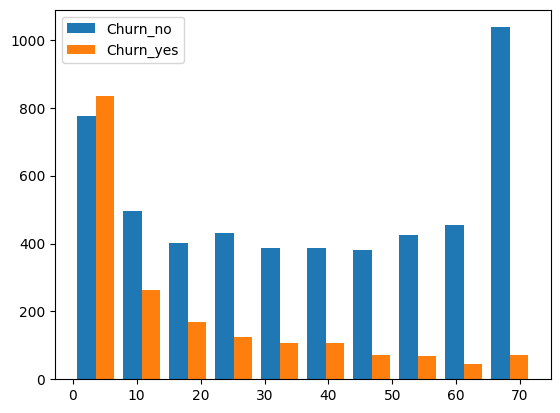

In [21]:
plt.hist([tenure_no,tenure_yes],label=['Churn_no','Churn_yes'])
plt.legend()
plt.show()

In [46]:
import dtale
d = dtale.show(data)
d

http://f1991c3be5a9:40000/dtale/main/3

In [20]:
object_=[]
num_=[]
for i in data.columns:

  if data[i].dtype=='O':
    print(f'{i} unique_items..{data[i].unique()}')
    object_.append(i)
  else: num_.append(i)
print(object_)
print(num_)

gender unique_items..['Female' 'Male']
Partner unique_items..['Yes' 'No']
Dependents unique_items..['No' 'Yes']
PhoneService unique_items..['No' 'Yes']
MultipleLines unique_items..['NO' 'No' 'Yes']
InternetService unique_items..['DSL' 'Fiber optic' 'No']
OnlineSecurity unique_items..['No' 'Yes' 'No internet service']
OnlineBackup unique_items..['Yes' 'No' 'No internet service']
DeviceProtection unique_items..['No' 'Yes' 'No internet service']
TechSupport unique_items..['No' 'Yes' 'No internet service']
StreamingTV unique_items..['No' 'Yes' 'No internet service']
StreamingMovies unique_items..['No' 'Yes' 'No internet service']
Contract unique_items..['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique_items..['Yes' 'No']
PaymentMethod unique_items..['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique_items..['No' 'Yes']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 

In [22]:
data.replace('No internet service','No',inplace =True)


In [23]:
for i in data.columns:

  if data[i].dtype=='O':
    print(f'{i} unique_items..{data[i].unique()}')

gender unique_items..['Female' 'Male']
Partner unique_items..['Yes' 'No']
Dependents unique_items..['No' 'Yes']
PhoneService unique_items..['No' 'Yes']
MultipleLines unique_items..['NO' 'No' 'Yes']
InternetService unique_items..['DSL' 'Fiber optic' 'No']
OnlineSecurity unique_items..['No' 'Yes']
OnlineBackup unique_items..['Yes' 'No']
DeviceProtection unique_items..['No' 'Yes']
TechSupport unique_items..['No' 'Yes']
StreamingTV unique_items..['No' 'Yes']
StreamingMovies unique_items..['No' 'Yes']
Contract unique_items..['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique_items..['Yes' 'No']
PaymentMethod unique_items..['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique_items..['No' 'Yes']


# converting yes and no to 1 and 0
* label  encoding
* one hot encoding

In [26]:
yes_= ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_:
  data[i].replace({'Yes':1,'No':0,' ':np.nan,'NO':0},inplace =True)

In [31]:
for i in data.columns:

    print(f'{i} unique_items..{data[i].unique(),data[i].dtype}')

gender unique_items..(array(['Female', 'Male'], dtype=object), dtype('O'))
SeniorCitizen unique_items..(array([0, 1]), dtype('int64'))
Partner unique_items..(array([1, 0]), dtype('int64'))
Dependents unique_items..(array([0, 1]), dtype('int64'))
tenure unique_items..(array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39]), dtype('int64'))
PhoneService unique_items..(array([0, 1]), dtype('int64'))
MultipleLines unique_items..(array([0, 1]), dtype('int64'))
InternetService unique_items..(array(['DSL', 'Fiber optic', 'No'], dtype=object), dtype('O'))
OnlineSecurity unique_items..(array([0, 1]), dtype('int64'))
OnlineBackup unique_items..(array([1, 0]), dtype('int64'))
DeviceProtection unique_items..(array([0, 1]), dtype('

In [34]:
obj_ = [i for i in data.columns if data[i].dtype=='O']
data_1= pd.get_dummies(data =data,columns =obj_,drop_first =True)
data_1.head(10)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,1,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,0,0,1,0,...,820.50,1,0,1,0,0,0,0,1,0
6,0,0,1,22,1,1,0,1,0,0,...,1949.40,0,1,1,0,0,0,1,0,0
7,0,0,0,10,0,0,1,0,0,0,...,301.90,0,0,0,0,0,0,0,0,1
8,0,1,0,28,1,1,0,0,1,1,...,3046.05,1,0,1,0,0,0,0,1,0
9,0,0,1,62,1,0,1,1,0,0,...,3487.95,0,1,0,0,1,0,0,0,0


In [40]:
data_1.dtypes,data_1.columns

(SeniorCitizen                              int64
 Partner                                    int64
 Dependents                                 int64
 tenure                                     int64
 PhoneService                               int64
 MultipleLines                              int64
 OnlineSecurity                             int64
 OnlineBackup                               int64
 DeviceProtection                           int64
 TechSupport                                int64
 StreamingTV                                int64
 StreamingMovies                            int64
 PaperlessBilling                           int64
 MonthlyCharges                           float64
 TotalCharges                             float64
 Churn                                      int64
 gender_Male                                uint8
 InternetService_Fiber optic                uint8
 InternetService_No                         uint8
 Contract_One year                          uint8


In [39]:
data_1['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

# Scaling or normalising the values
# splitting the data into testing and trainig data

In [41]:
from sklearn.preprocessing import MinMaxScaler
col_scaling = ['tenure','TotalCharges','MonthlyCharges']
min = MinMaxScaler()
data_1[col_scaling] = min.fit_transform(data_1[col_scaling])

In [45]:
from sklearn.model_selection import train_test_split
x = data_1.drop('Churn',axis =1)
y = data_1['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.70,random_state =42)


In [46]:
print('x_Train  ',x_train.shape)
print('y_Train  ',y_train.shape)
print('x_Test  ',x_test.shape)
print('y_test  ',y_test.shape)

x_Train   (2112, 23)
y_Train   (2112,)
x_Test   (4931, 23)
y_test   (4931,)


# Model Building (ANN)

In [68]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(23,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

clip_norm_value = 1.0  # Set the maximum gradient norm value for clipping
optimizer = Adam(learning_rate=0.001, clipnorm=clip_norm_value)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train your model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
66/66 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7443
Epoch 2/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 3/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 4/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 5/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 6/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 7/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 8/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 9/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 10/20
66/66 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7448
Epoch 11/20
66/66 [==============================

In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                1536      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.evaluate(x_test, y_test)

155/155 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7303


[nan, 0.7302778363227844]

In [ ]:
y_pred = model.predict(x_test)

In [73]:
y_pre = []
for element in y_pred:
    if element > 0.5:
        y_pre.append(1)
    else:
        y_pre.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pre))

Text(95.72222222222221, 0.5, 'Truth')

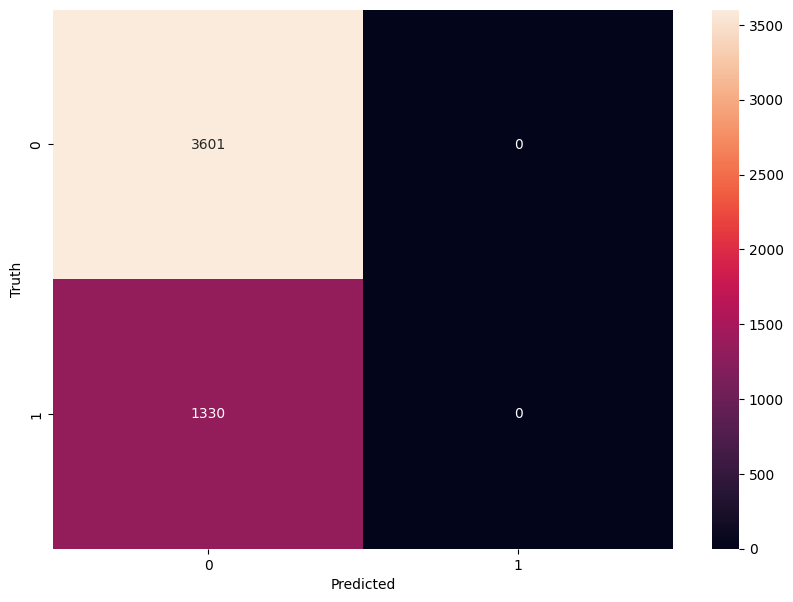

In [77]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pre)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')